In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statistics
import os

In [3]:
city_data_to_load = "PyBer_Analysis/city_data.csv"
ride_data_to_load = "PyBer_Analysis/ride_data.csv"


In [4]:
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [5]:
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [6]:
city_data_df.count()


city            120
driver_count    120
type            120
dtype: int64

In [7]:
# REWIND
    # To get the name of each column and the number of rows that are not null, we can use the df.count() method.
    # Another option is to use df.isnull().sum() method chaining.
    
# Get the columns and the rows that are not null.

city_data_df.count()
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [8]:
# REWIND
    #To get the data types of each column, we use the dtypes on the DataFrame.
    
# Get the data types of each column, use the "dtypes" function

city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [9]:
# REWIND
    # We can use the unique() method on a specific column, 
    # which will return an array, or list, of all the unique values of that column
    
# Get the unique values of the type of city.

city_data_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [10]:
# Get the number of data points from the Urban cities.

sum(city_data_df['type']=='Urban')

66

In [11]:
sum(city_data_df['type']=='Suburban')

36

In [12]:
sum(city_data_df['type']=='Rural')

18

In [13]:
# Get the columns and the rows that are not null.

ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [14]:
# Get the columns and the rows that are not null.

ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [15]:
# Get the data types of each column.

ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [16]:
# Merging DataFrames

# REWIND
    # When we merge two DataFrames, we merge on a column with the same data, 
    # and the same column name, in both DataFrames. We use the following syntax to do that:
        # new_df = pd.merge(leftdf, rightdf, on=["column_leftdf", "column_rightdf"])

    # We may have to merge the DataFrames using the how = parameter either left, right, inner, or outer depending 
    # how we want to merge the DataFrames. The default is inner.
    
# Combine the data into a single dataset

pyber_data_df = pd.merge(ride_data_df, city_data_df, how='left', on=['city', 'city'])

# Display the DataFrame

pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [17]:
# Create The Urban, Rural, & Suburban DataFrame

urban_cities_df = pyber_data_df[pyber_data_df['type']=='Urban']
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [18]:
rural_cities_df = pyber_data_df[pyber_data_df['type']=='Rural']
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [19]:
suburban_cities_df = pyber_data_df[pyber_data_df['type']=='Suburban']
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [20]:
# REWIND
  # To create a Data Series with one of the columns in a DataFrame, we can use the groupby() function and add the 
  # column inside the parentheses.

  # Using the groupby() function can be used to group large amounts of data when we want to 
  # compute mathematical operations on these groups.

# Get the number of rides for urban, rural & suburban cities.

urban_ride_count = urban_cities_df.groupby(['city']).count()['ride_id']
urban_ride_count.head()                                                            


city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [21]:
rural_ride_count = rural_cities_df.groupby(['city']).count()['ride_id']
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [22]:
suburban_ride_count = suburban_cities_df.groupby(['city']).count()['ride_id']
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [23]:
# Get average fare for each city in the urban, rural, & suburban cities.

urban_avg_fare = urban_cities_df.groupby(['city']).mean()['fare']
urban_avg_fare.head()


city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [24]:
rural_avg_fare = rural_cities_df.groupby(['city']).mean()['fare']
rural_avg_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [25]:
suburban_avg_fare = suburban_cities_df.groupby(['city']).mean()['fare']
suburban_avg_fare.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [26]:
# Get the average number of drivers for each urban, rural, & suburban city.
urban_driver_count = urban_cities_df.groupby(['city']).mean()['driver_count']
urban_driver_count.head()


city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [27]:
rural_driver_count = rural_cities_df.groupby(['city']).mean()['driver_count']
rural_driver_count.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

In [28]:
suburban_driver_count = suburban_cities_df.groupby(['city']).mean()['driver_count']
suburban_driver_count.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

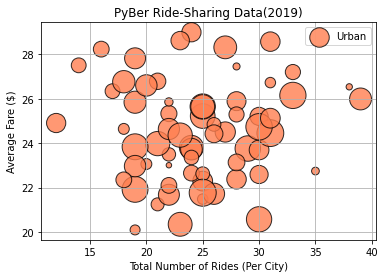

In [30]:
# Rewind
# To create a scatter plot using the MATLAB method, use the plt.scatter() function.
        # x_axis = urban_ride_count & y_axise = urban_avg_fare. 
        # We will be using this code to also show rural & suburban
        
# Build the scatter plots for urban cities.

plt.scatter(urban_ride_count, 
            urban_avg_fare,
           s=10*urban_driver_count, c='coral',
           edgecolor='black', linewidths=1,
           alpha=0.8, label='Urban')

plt.title('PyBer Ride-Sharing Data(2019)')
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.grid(True)

# Add a legend

plt.legend()



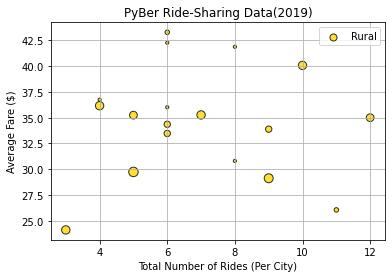

In [31]:
plt.scatter(rural_ride_count,
           rural_avg_fare,
           s=10*rural_driver_count, c='gold',
           edgecolor='black', linewidth=1,
           alpha=0.8, label='Rural')

plt.title('PyBer Ride-Sharing Data(2019)')
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.grid(True)

# Add the legend

plt.legend()

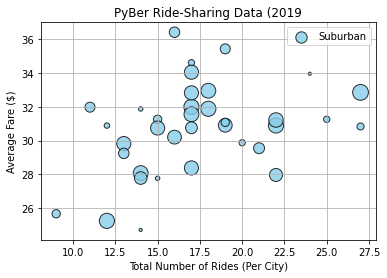

In [100]:
plt.scatter(suburban_ride_count,
           suburban_avg_fare,
           s=10*suburban_driver_count, c='skyblue',
           edgecolor='black', linewidth=1,
           alpha=0.8, label="Suburban")

plt.title('PyBer Ride-Sharing Data (2019')
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.grid(True)

# Add the legend

plt.legend()

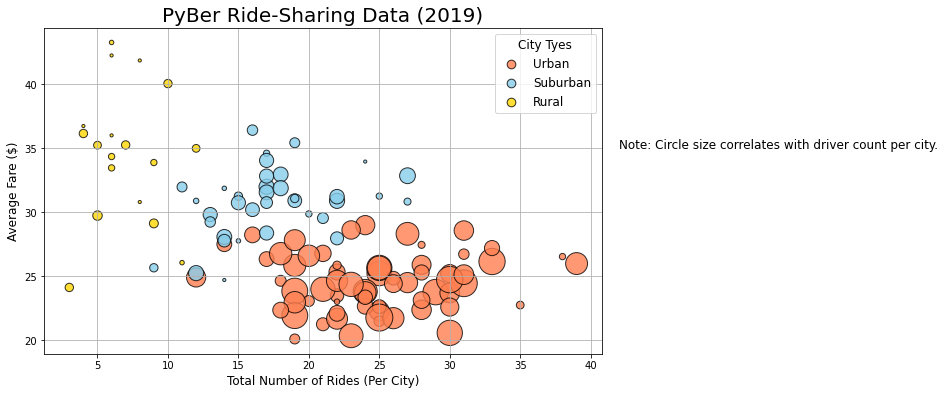

In [101]:
# To create a bubble chart that showcases all the different city types in one chart, 
# we'll combine our three scatter plot code blocks in one Jupyter Notebook cell.

# Add the three plt.scatter() functions

# Add the scatter charts for each type of city.

plt.subplots(figsize=(10, 6))
plt.scatter(urban_ride_count, 
            urban_avg_fare,
           s=10*urban_driver_count, c='coral',
           edgecolor='black', linewidths=1,
           alpha=0.8, label='Urban')

plt.scatter(suburban_ride_count,
           suburban_avg_fare,
           s=10*suburban_driver_count, c='skyblue',
           edgecolor='black', linewidth=1,
           alpha=0.8, label="Suburban")


plt.scatter(rural_ride_count,
           rural_avg_fare,
           s=10*rural_driver_count, c='gold',
           edgecolor='black', linewidth=1,
           alpha=0.8, label='Rural')

# Incorporate the other graph properties

plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Add and update the Legend 

lgnd = plt.legend(fontsize='12', mode='Expanded',
        scatterpoints=1, loc='best', title="City Tyes")

lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, 'Note: Circle size correlates with driver count per city.', fontsize='12')

plt.savefig('Analysis/RideSharingData.jpeg')

plt.show()

# Show the plot

    #fig1 = plt.gcf()
    #plt.show()
    #plt.draw()
    #fig1.savefig('Analysis/RideSharingData.png', dpi=100)

# Save the figure

 # plt.savefig('Analysis/RideSharingData.jpeg')

In [102]:
# The old adage "There are many ways to skin a cat" comes to mind when getting the summary statistics. 
# We'll use and compare the following three ways to calculate the summary statistics:

    # The Pandas describe() function on the DataFrame or Series.
    # The Pandas mean(), median(), and mode() methods on a Series.
    # The NumPy mean() and median() functions, and the SciPy stats mode() function on a Series.
    
# Get the summary statistics.

urban_cities_df.describe()



,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [103]:
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [104]:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [105]:
# Get summary statistics.

urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [106]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [107]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [108]:
# Pandas mean(), median(), and mode() Methods
    # If we want to get only the mean without getting the complete summary statistics, we can use the mean() method.
    # Add the following code to a new cell and run the cell.
    
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(), 2)

(24.62, 17.36, 6.94)

In [109]:
# To find the median we use the same method as mean.

round(urban_ride_count.median()), round(suburban_ride_count.median()), round(rural_ride_count.median())

(24, 17, 6)

In [110]:
# Calculate the mode of the ride count for the urban cities.

round(urban_ride_count.mode())

0    22
1    25
Name: ride_id, dtype: int64

In [111]:
round(suburban_ride_count.mode()),round(rural_ride_count.mode())

(0    17
 Name: ride_id, dtype: int64,
 0    6
 Name: ride_id, dtype: int64)

In [112]:
# Import NumPy and the stats module from SciPy.

import numpy as np
import scipy.stats as sts

In [113]:
# Let's calculate the mean, median, and mode—otherwise known as the measures of central 
# tendency for the ride counts—and print out those measures.

# To get the measures of central tendency of the ride counts for the urban cities, add the following code block.

# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f'The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.')


median_urban_ride_count = np.median(urban_ride_count)
print(f'The median for the ride counts for urban trips is {median_urban_ride_count}.')



mode_urban_ride_count = sts.mode(urban_ride_count)
print(f'The mode for the ride counts for urban trips is {mode_urban_ride_count}.')





The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7])).


In [114]:
# Calculate the measures of central tendency for the ride count for the suburban cities.
mean_surburban_ride_count = np.mean(suburban_ride_count)
print(f'The mean for the ride counts for suburban trips is {mean_surburban_ride_count:.2f}.')


median_suburban_ride_count = np.median(suburban_ride_count)
print(f'The median for the ride counts for suburban trips is {median_suburban_ride_count}.')



mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f'The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.')

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17]), count=array([7])).


In [115]:
# Calculate the measures of central tendency for the ride count for the rural cities.
mean_rural_ride_count = np.mean(rural_ride_count)
print(f'The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.')


median_rural_ride_count = np.median(rural_ride_count)
print(f'The median for the ride counts for rural trips is {median_rural_ride_count}.')



mode_rural_ride_count = sts.mode(rural_ride_count)
print(f'The mode for the ride counts for rural trips is {mode_rural_ride_count}.')

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6]), count=array([5])).


In [116]:
# Get the fares for the urban cities.

urban_fares = urban_cities_df['fare']
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [117]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f'The mean price for urban trips is ${mean_urban_fares:.2f}.')


median_urban_fares = np.median(urban_fares)
print(f'The median price for urban trips is ${median_urban_fares:.2f}.')



mode_urban_fares = sts.mode(urban_fares)
print(f'The mode price for urban trips is {mode_urban_fares}.')


The mean price for urban trips is $24.53.
The median price for urban trips is $24.64.
The mode price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [118]:
suburban_fares = suburban_cities_df['fare']
suburban_fares.head()

1625    27.79
1626    18.75
1627    21.71
1628    17.10
1629    37.78
Name: fare, dtype: float64

In [119]:
rural_fares = rural_cities_df['fare']
rural_fares.head()

2250    43.22
2251    12.42
2252    54.85
2253    47.90
2254    51.80
Name: fare, dtype: float64

In [120]:
# Calculate the measures of central tendency for the ride count for the suburban cities.
mean_suburban_fares = np.mean(suburban_fares)
print(f'The mean price for urban trips is ${mean_suburban_fares:.2f}.')


median_suburban_fares = np.median(suburban_fares)
print(f'The median price for urban trips is ${median_suburban_fares:.2f}.')



mode_suburban_fares = sts.mode(suburban_fares)
print(f'The mode price for urban trips is{mode_suburban_fares}.')

The mean price for urban trips is $30.97.
The median price for urban trips is $30.75.
The mode price for urban trips isModeResult(mode=array([17.99]), count=array([3])).


In [121]:
# Calculate the measures of central tendency for the ride count for the rural cities.
mean_rural_fares = np.mean(rural_fares)
print(f'The mean price for rural trips is ${mean_rural_fares:.2f}.')


median_rural_fares = np.median(rural_fares)
print(f'The median price for rural trips is ${median_rural_fares:.2f}.')



mode_rural_fares = sts.mode(rural_fares)
print(f'The mode price for rural trips is{mode_rural_fares}.')

The mean price for rural trips is $34.62.
The median price for rural trips is $37.05.
The mode price for rural trips isModeResult(mode=array([37.05]), count=array([2])).


In [122]:
urban_drivers = urban_cities_df['driver_count']
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [123]:
suburban_drivers = suburban_cities_df['driver_count']
suburban_drivers.head()

1625    11
1626    20
1627    22
1628    19
1629    12
Name: driver_count, dtype: int64

In [124]:
rural_drivers = rural_cities_df['driver_count']
rural_drivers.head()

2250    9
2251    8
2252    6
2253    2
2254    2
Name: driver_count, dtype: int64

In [125]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_drivers = np.mean(urban_drivers)
print(f'The mean price for urban drivers is ${mean_urban_drivers:.2f}.')


median_urban_drivers = np.median(urban_drivers)
print(f'The median price for urban drivers is ${median_urban_fares:.2f}.')



mode_urban_drivers = sts.mode(urban_drivers)
print(f'The mode price for urban drivers is {mode_urban_fares}.')

The mean price for urban drivers is $36.68.
The median price for urban drivers is $24.64.
The mode price for urban drivers is ModeResult(mode=array([22.86]), count=array([5])).


In [126]:
# Calculate the measures of central tendency for the ride count for the suburban cities.
mean_suburban_drivers = np.mean(suburban_drivers)
print(f'The mean price for urban drivers is ${mean_suburban_drivers:.2f}.')


median_suburban_drivers = np.median(suburban_drivers)
print(f'The median price for urban drivers is ${median_suburban_drivers:.2f}.')



mode_suburban_drivers = sts.mode(suburban_drivers)
print(f'The mode price for urban drivers is{mode_suburban_drivers}.')

The mean price for urban drivers is $13.71.
The median price for urban drivers is $16.00.
The mode price for urban drivers isModeResult(mode=array([20]), count=array([79])).


In [127]:
# Calculate the measures of central tendency for the ride count for the rural cities.
mean_rural_drivers = np.mean(rural_drivers)
print(f'The mean price for rural drivers is ${mean_rural_drivers:.2f}.')


median_rural_drivers = np.median(rural_drivers)
print(f'The median price for rural drivers is ${median_rural_drivers:.2f}.')



mode_rural_drivers = sts.mode(rural_drivers)
print(f'The mode price for rural drivers is{mode_rural_drivers}.')


The mean price for rural drivers is $4.30.
The median price for rural drivers is $4.00.
The mode price for rural drivers isModeResult(mode=array([1]), count=array([32])).


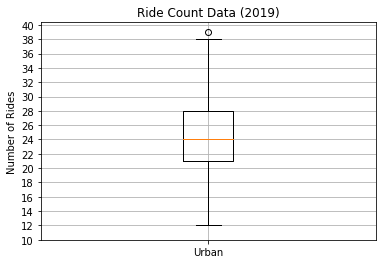

In [128]:
# Box-and-Whisker Plots for Ride Count Data
    # Creating a box-and-whisker plot requires that we use the ax.boxplot() function, which takes an array 
    # inside the parentheses. We can also add a title and axes labels as we have done before.

# Let's create our urban_ride_count box-and-whisker plot.

# Create a box-and-whisker plot for the urban cities ride count.

x_labels = ['Urban']
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)

# Add the title, y-axis and grid

ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()


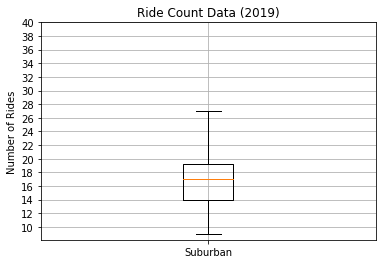

In [129]:
# SKILL DRILL
    # Calculate the summary statistics with box-and-whisker plots on the number of suburban and rural rides.
    
x_labels = ['Suburban']
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)

# Add the title, y-axis and grid

ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

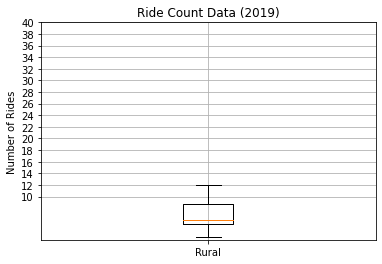

In [130]:
x_labels = ['Rural']
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)

# Add the title, y-axis and grid

ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

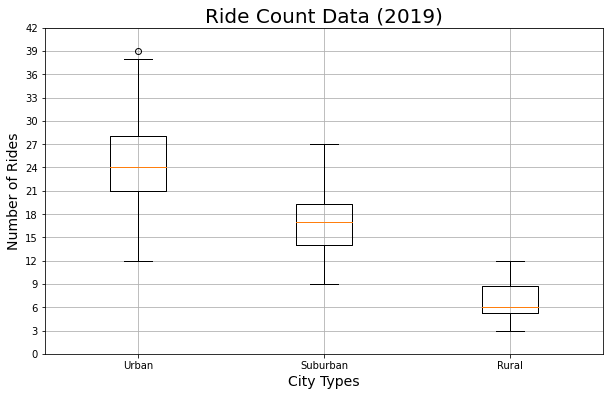

In [140]:
# To show all the city type box-and-whisker plots on one chart we need to 
# modify the boxplot() function and add other features. 
# We will increase the size of the chart and the font of the title and axes labels.

# Add all ride count box-and-whisker plots to the same graph.

x_labels = ['Urban', 'Suburban', 'Rural']
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fix, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel('City Types',fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()

# Save the figure

plt.savefig('Analysis/Fig2.jpeg')

plt.show()


In [132]:
# We can get all the "True" values where the urban_ride_count equals 39. 
# Then, we can filter the urban_ride_count Series for all the "True" values and get the 
# city name from the index, like this:

# Get the city that matches 39.

urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f'{urban_city_outlier} has the highest rider count.')


West Angela has the highest rider count.


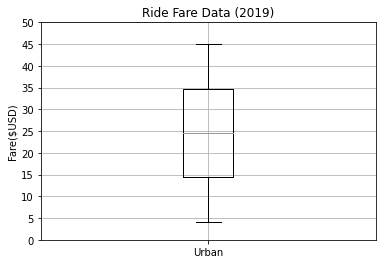

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [134]:
# Box-and-Whisker Plots for Ride Fare Data

# Next, let's create box-and-whisker plots for the ride fare data with summary statistics.
# For the fare data, we will use the urban_fares Series we created earlier. Add the following code to the new cell:

# Create a box-and-whisker plot for the urban fare data.

x_labels = ['Urban']
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)

# Add the title, y-axis label and grid

ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print('Summary Statistics')
urban_fares.describe()

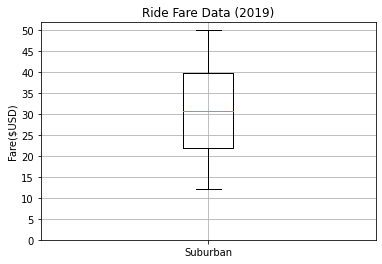

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [135]:
# Create a box-and-whisker plot for the suburban fare data.

x_labels = ['Suburban']
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)

# Add the title, y-axis label and grid

ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print('Summary Statistics')
urban_fares.describe()

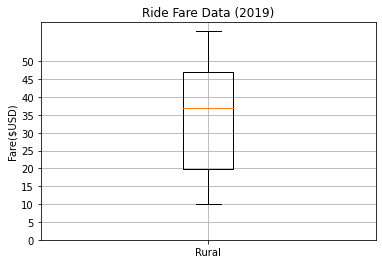

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [138]:
# Create a box-and-whisker plot for the rural fare data.

x_labels = ['Rural']
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)

# Add the title, y-axis label and grid

ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print('Summary Statistics')
urban_fares.describe()

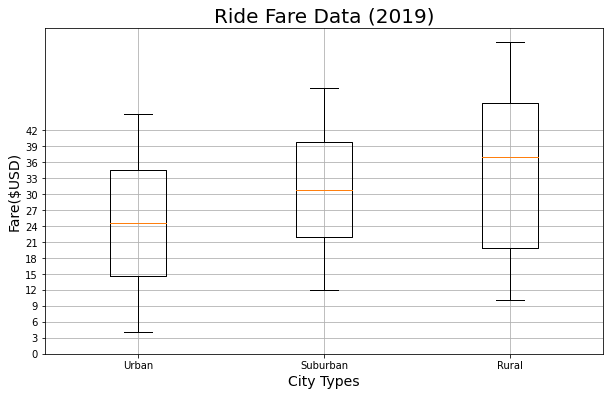

In [139]:
# Add all ride count box-and-whisker plots to the same graph.

x_labels = ['Urban', 'Suburban', 'Rural']
ride_fares_data = [urban_fares, suburban_fares, rural_fares]
fix, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Fare Data (2019)',fontsize=20)
ax.set_ylabel('Fare($USD)',fontsize=14)
ax.set_xlabel('City Types',fontsize=14)
ax.boxplot(ride_fares_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()

# Save the figure

plt.savefig('Analysis/Fig3.jpeg')

plt.show()

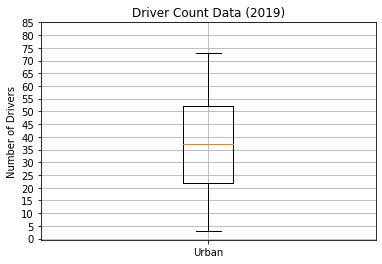

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [141]:
# Box-and-Whisker Plots for Driver Count Data

# We're getting really good at creating box-and-whisker plots! 
# We need to do one last set of box-and-whisker plots. 
# Let's create a box-and-whisker plot for the driver count data with summary statistics.

# For the driver count data, we'll use the urban_drivers Series we created earlier. 
# Add the following code to a new cell:

# Create the box-and-whisker plot for the urban driver count data.

x_labels = ['Urban']
fig, ax = plt.subplots()
ax.boxplot(urban_drivers, labels=x_labels)

# Add the title, y-axis label and grid

ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print('Summary Statistics')
urban_drivers.describe()


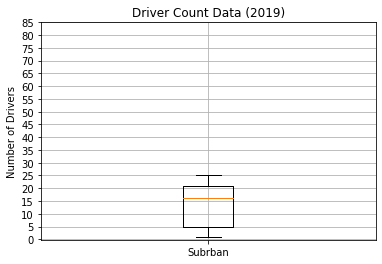

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [142]:
# Create the box-and-whisker plot for the suburban driver count data.

x_labels = ['Subrban']
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers, labels=x_labels)

# Add the title, y-axis label and grid

ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print('Summary Statistics')
urban_drivers.describe()

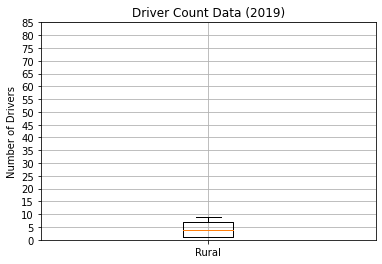

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [143]:
# Create the box-and-whisker plot for the rural driver count data.

x_labels = ['Rural']
fig, ax = plt.subplots()
ax.boxplot(rural_drivers, labels=x_labels)

# Add the title, y-axis label and grid

ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print('Summary Statistics')
urban_drivers.describe()

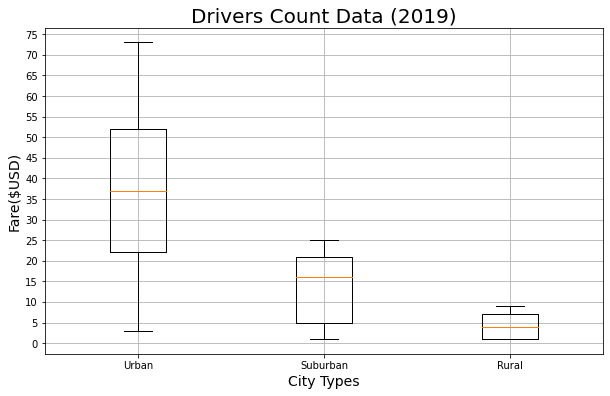

In [146]:
# Add all ride count box-and-whisker plots to the same graph.

x_labels = ['Urban', 'Suburban', 'Rural']
drivers_count_data = [urban_drivers, suburban_drivers, rural_drivers]
fix, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Drivers Count Data (2019)',fontsize=20)
ax.set_ylabel('Fare($USD)',fontsize=14)
ax.set_xlabel('City Types',fontsize=14)
ax.boxplot(drivers_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 80, step=5.0))
ax.grid()

# Save the figure

plt.savefig('Analysis/Fig4.jpeg')

plt.show()